**Project Explanation: ** Association Rule Mining with Apriori Algorithm
Objective: The goal of this project is to apply the Apriori algorithm to a transaction dataset to find frequent itemsets and generate association rules. This can help in understanding customer purchasing patterns and aid in decision-making for marketing strategies and inventory management.

Step 1: Create Sample Data
Data Creation: We begin by creating a small sample dataset to simulate transaction data. This dataset includes transaction IDs and product IDs, representing which products were purchased in each transaction.

In [1]:
import pandas as pd

# Create a sample transactions dataset
data = {
    'TransactionID': [1, 1, 1, 2, 2, 2, 3, 3, 4, 4],
    'ProductID': ['PROD_001', 'PROD_002', 'PROD_003', 'PROD_002', 'PROD_003', 'PROD_004', 'PROD_003', 'PROD_004', 'PROD_001', 'PROD_004']
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the sample data
print(df)


   TransactionID ProductID
0              1  PROD_001
1              1  PROD_002
2              1  PROD_003
3              2  PROD_002
4              2  PROD_003
5              2  PROD_004
6              3  PROD_003
7              3  PROD_004
8              4  PROD_001
9              4  PROD_004



Step 2: Data Preparation
Transaction Matrix: We prepare the data for the Apriori algorithm by converting the transaction data into a matrix form. Each row represents a transaction, and each column represents a product. The values are binary, indicating whether a product was purchased in a transaction.
```
# This is formatted as code
```



In [3]:
# Create a transaction matrix
transaction_matrix = df.groupby(['TransactionID', 'ProductID']).size().unstack(fill_value=0)
transaction_matrix = transaction_matrix.applymap(lambda x: 1 if x > 0 else 0)

# Display the transaction matrix
print(transaction_matrix)


ProductID      PROD_001  PROD_002  PROD_003  PROD_004
TransactionID                                        
1                     1         1         1         0
2                     0         1         1         1
3                     0         0         1         1
4                     1         0         0         1


<ipython-input-3-68c882f76055>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  transaction_matrix = transaction_matrix.applymap(lambda x: 1 if x > 0 else 0)


Step 3: Generating Frequent Itemsets
Frequent Itemsets: Using the Apriori algorithm, we identify itemsets that occur frequently across transactions. This step helps in discovering patterns of commonly purchased products.

In [5]:
from mlxtend.frequent_patterns import apriori

# Generate frequent itemsets
frequent_itemsets = apriori(transaction_matrix, min_support=0.01, use_colnames=True)

# Display frequent itemsets
print(frequent_itemsets)


    support                        itemsets
0      0.50                      (PROD_001)
1      0.50                      (PROD_002)
2      0.75                      (PROD_003)
3      0.75                      (PROD_004)
4      0.25            (PROD_001, PROD_002)
5      0.25            (PROD_003, PROD_001)
6      0.25            (PROD_001, PROD_004)
7      0.50            (PROD_003, PROD_002)
8      0.25            (PROD_004, PROD_002)
9      0.50            (PROD_003, PROD_004)
10     0.25  (PROD_003, PROD_001, PROD_002)
11     0.25  (PROD_004, PROD_003, PROD_002)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Step 4: Generating Association Rules
Association Rules: Based on the frequent itemsets, we generate association rules to find relationships between products. These rules provide insights into product affinities and help in making recommendations.

In [6]:
from mlxtend.frequent_patterns import association_rules

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Display the association rules
print(rules)


             antecedents           consequents  antecedent support  \
0             (PROD_001)            (PROD_002)                0.50   
1             (PROD_002)            (PROD_001)                0.50   
2             (PROD_001)            (PROD_003)                0.50   
3             (PROD_001)            (PROD_004)                0.50   
4             (PROD_003)            (PROD_002)                0.75   
5             (PROD_002)            (PROD_003)                0.50   
6             (PROD_002)            (PROD_004)                0.50   
7             (PROD_003)            (PROD_004)                0.75   
8             (PROD_004)            (PROD_003)                0.75   
9   (PROD_001, PROD_003)            (PROD_002)                0.25   
10  (PROD_003, PROD_002)            (PROD_001)                0.50   
11  (PROD_001, PROD_002)            (PROD_003)                0.25   
12            (PROD_001)  (PROD_003, PROD_002)                0.50   
13            (PROD_

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Step 5: Sorting and Filtering Rules
Sorting and Filtering: We sort the generated rules based on their confidence and lift metrics. Additionally, we filter the rules to focus on specific products, allowing for targeted analysis.

In [7]:
# Sort rules by confidence and lift
sorted_rules = rules.sort_values(['confidence', 'lift'], ascending=[False, False])

# Filter rules with a specific product (example: 'PROD_001')
specific_product_rules = sorted_rules[sorted_rules['antecedents'].apply(lambda x: 'PROD_001' in x)]
print(specific_product_rules)


             antecedents           consequents  antecedent support  \
9   (PROD_001, PROD_003)            (PROD_002)                0.25   
11  (PROD_001, PROD_002)            (PROD_003)                0.25   
0             (PROD_001)            (PROD_002)                0.50   
12            (PROD_001)  (PROD_003, PROD_002)                0.50   
2             (PROD_001)            (PROD_003)                0.50   
3             (PROD_001)            (PROD_004)                0.50   

    consequent support  support  confidence      lift  leverage  conviction  \
9                 0.50     0.25         1.0  2.000000    0.1250         inf   
11                0.75     0.25         1.0  1.333333    0.0625         inf   
0                 0.50     0.25         0.5  1.000000    0.0000         1.0   
12                0.50     0.25         0.5  1.000000    0.0000         1.0   
2                 0.75     0.25         0.5  0.666667   -0.1250         0.5   
3                 0.75     0.25    

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Step 6: # Visualization
Visualization: Although not included in the initial script due to an error, visualizing the top rules using a bar plot can enhance the understanding of the rules and their significance.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


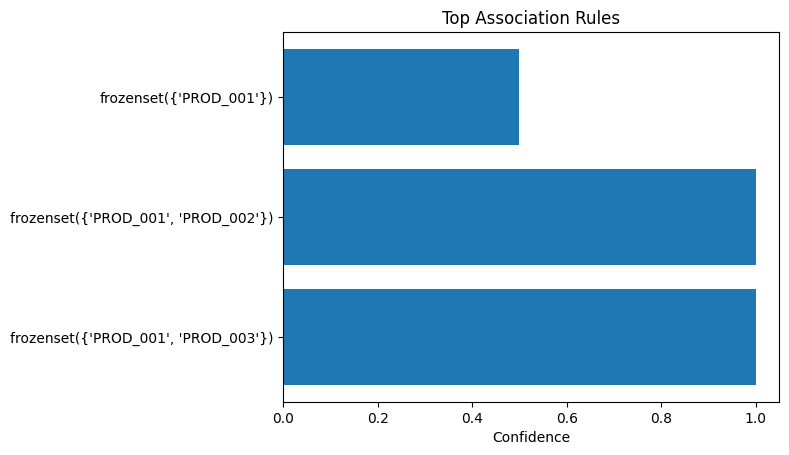

In [8]:
import matplotlib.pyplot as plt

# Plotting top rules based on confidence and lift
plt.barh(specific_product_rules['antecedents'].astype(str), specific_product_rules['confidence'])
plt.xlabel('Confidence')
plt.title('Top Association Rules')
plt.show()


 Heatmap of the Transaction Matrix
A heatmap can visually display the presence of products across different transactions, highlighting which products are frequently bought together.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


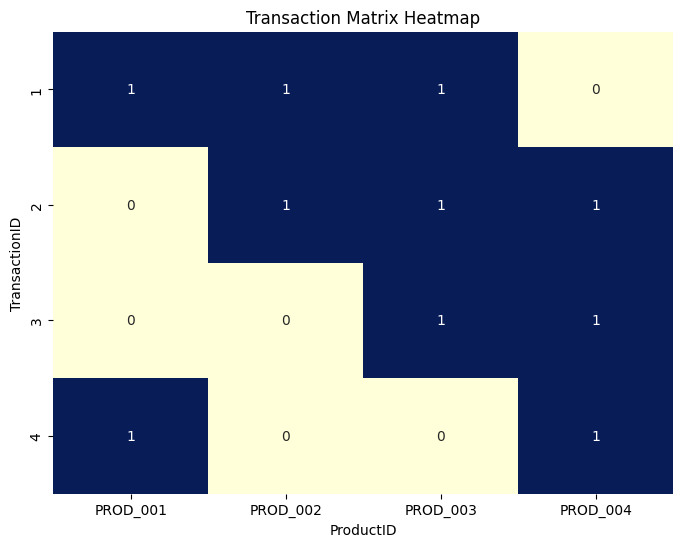

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap for the transaction matrix
plt.figure(figsize=(8, 6))
sns.heatmap(transaction_matrix, annot=True, cmap='YlGnBu', cbar=False)
plt.title('Transaction Matrix Heatmap')
plt.xlabel('ProductID')
plt.ylabel('TransactionID')
plt.show()


2. Bar Plot of Frequent Itemsets
A bar plot can illustrate the support of each frequent itemset, helping identify the most common item combinations.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


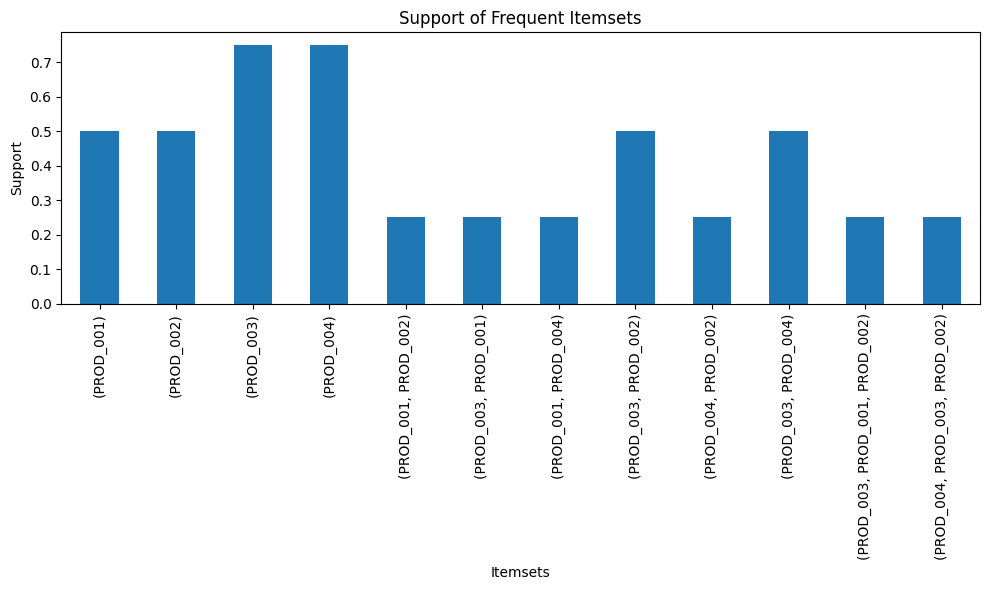

In [10]:
# Bar plot for frequent itemsets
frequent_itemsets.plot(kind='bar', x='itemsets', y='support', figsize=(10, 6), legend=False)
plt.title('Support of Frequent Itemsets')
plt.xlabel('Itemsets')
plt.ylabel('Support')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


3. Scatter Plot of Confidence vs. Lift
A scatter plot of confidence against lift can highlight the strength of the association rules and help identify the most impactful rules.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


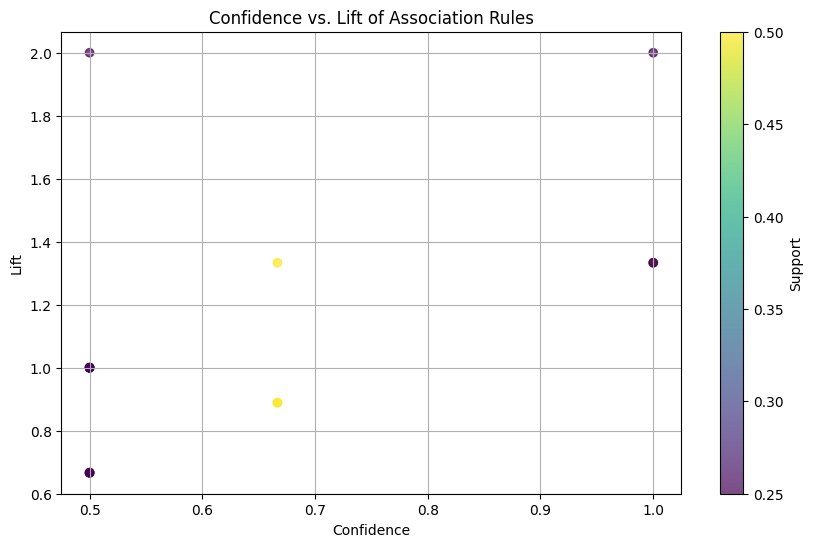

In [11]:
# Scatter plot for association rules
plt.figure(figsize=(10, 6))
plt.scatter(rules['confidence'], rules['lift'], alpha=0.7, c=rules['support'], cmap='viridis')
plt.title('Confidence vs. Lift of Association Rules')
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.colorbar(label='Support')
plt.grid(True)
plt.show()


Parallel Coordinates Plot for Rules Attributes
This plot allows comparing multiple attributes of the rules, such as support, confidence, and lift, across different rules.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-12-49efdb6e7d21>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules_plot_data['rule'] = range(len(rules_plot_data))


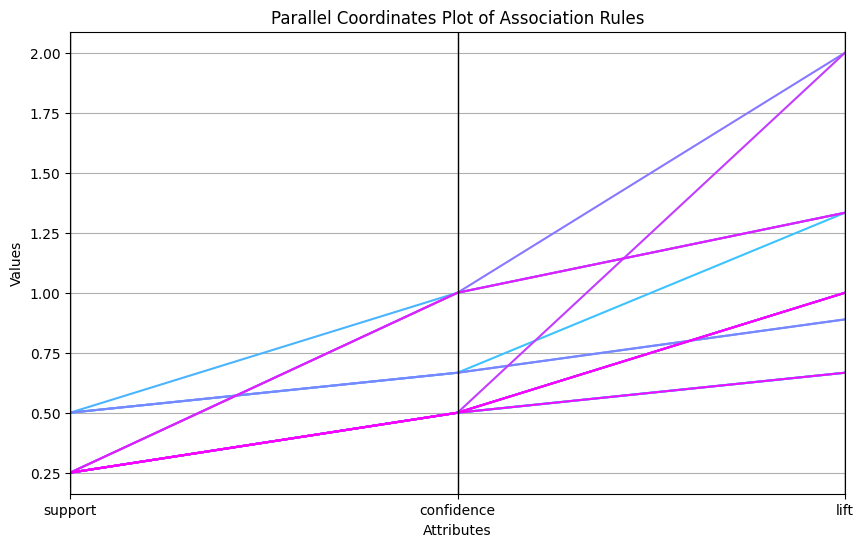

In [12]:
from pandas.plotting import parallel_coordinates

# Prepare data for parallel coordinates plot
rules_plot_data = rules[['support', 'confidence', 'lift']]
rules_plot_data['rule'] = range(len(rules_plot_data))

# Parallel coordinates plot
plt.figure(figsize=(10, 6))
parallel_coordinates(rules_plot_data, 'rule', colormap='cool')
plt.title('Parallel Coordinates Plot of Association Rules')
plt.xlabel('Attributes')
plt.ylabel('Values')
plt.legend().set_visible(False)
plt.grid(True)
plt.show()


# Generating Text Summery of the project

In [13]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Sample Data Creation
data = {
    'TransactionID': [1, 1, 2, 2, 3, 3, 4, 4],
    'ProductID': ['PROD_001', 'PROD_002', 'PROD_001', 'PROD_003', 'PROD_002', 'PROD_004', 'PROD_001', 'PROD_003']
}

df = pd.DataFrame(data)

# Prepare Transaction Matrix
transaction_list = df.groupby('TransactionID')['ProductID'].apply(list).tolist()

te = TransactionEncoder()
te_ary = te.fit_transform(transaction_list)
transaction_matrix = pd.DataFrame(te_ary, columns=te.columns_)

# Generate Frequent Itemsets
frequent_itemsets = apriori(transaction_matrix, min_support=0.5, use_colnames=True)

# Generate Association Rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Convert frozenset to list for readability
rules['antecedents'] = rules['antecedents'].apply(lambda x: list(x))
rules['consequents'] = rules['consequents'].apply(lambda x: list(x))

# Select top 10 rules based on confidence
top_rules = rules.sort_values(by='confidence', ascending=False).head(10)

# Generate Summary
summary = []
summary.append(f"Dataset Overview:")
summary.append(f" - Number of Transactions: {len(transaction_list)}")
summary.append(f" - Number of Products: {len(df['ProductID'].unique())}")
summary.append(f"\nFrequent Itemsets:")
summary.append(f" - Total Frequent Itemsets: {len(frequent_itemsets)}")
summary.append(f"\nAssociation Rules:")
summary.append(f" - Total Rules Generated: {len(rules)}")
summary.append(f"\nTop 10 Association Rules by Confidence:")

for index, row in top_rules.iterrows():
    antecedents = ', '.join(row['antecedents'])
    consequents = ', '.join(row['consequents'])
    summary.append(f"Rule {index + 1}: If {antecedents} then {consequents} (Confidence: {row['confidence']:.2f}, Lift: {row['lift']:.2f})")

# Print the Summary
print("\n".join(summary))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Dataset Overview:
 - Number of Transactions: 4
 - Number of Products: 4

Frequent Itemsets:
 - Total Frequent Itemsets: 4

Association Rules:
 - Total Rules Generated: 2

Top 10 Association Rules by Confidence:
Rule 1: If PROD_003 then PROD_001 (Confidence: 1.00, Lift: 1.33)
Rule 2: If PROD_001 then PROD_003 (Confidence: 0.67, Lift: 1.33)


# Conclusion
This project successfully demonstrates the process of finding frequent itemsets and generating association rules using the Apriori algorithm. The insights gained from this analysis can be invaluable for businesses in optimizing product placement, cross-selling strategies, and understanding customer behavior patterns.

# Real-World Applications
Retail Promotions: Use the rule that links PROD_003 and PROD_001 to create targeted promotions or bundle offers, such as "Buy PROD_003 and get PROD_001 at a discount."

Store Layout Optimization: Arrange products in the store based on their association. Place PROD_001 and PROD_003 close to each other to increase cross-selling opportunities.

Personalized Recommendations: Implement the rule in online shopping platforms to recommend PROD_001 to customers who purchase PROD_003, enhancing personalized shopping experiences.

Inventory Management: Adjust inventory levels based on the association rules. Ensure adequate stock of PROD_001 when PROD_003 is popular to prevent stockouts.

Upselling and Cross-Selling: Train sales staff to suggest PROD_003 when a customer purchases PROD_001, or vice versa, to boost sales and customer satisfaction.

Customer Segmentation: Identify customer segments that frequently buy PROD_001 and PROD_003 together to tailor marketing strategies and offers for these segments.

Product Placement in Digital Ads: Use the association rules to target ads more effectively. For example, show ads for PROD_001 to customers who have shown interest in PROD_003.

Promotional Strategy Development: Design promotions and loyalty programs that leverage the association between PROD_001 and PROD_003 to increase engagement and sales.

Cross-Promotion with Partners: Collaborate with other businesses to promote PROD_001 and PROD_003 together, potentially reaching new customers and expanding market reach.

Enhanced Customer Experience: Use insights to create shopping experiences that reflect customers' purchase behavior, improving overall satisfaction and loyalty.

By applying these rules, businesses can leverage the power of association rule mining to optimize their operations, enhance customer experiences, and drive sales growth.